In [331]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import scipy.stats as stats

In [332]:
df = pd.read_csv("bike_dataset.csv")

def extract_cc(name):
  result = re.search(r'(\d{3})$', name)
  return result.group(0) if result != None else np.nan

df = df.copy()
df["CC"] = df["name"].apply(extract_cc)
df["CC"] = df["CC"].astype("Int64")

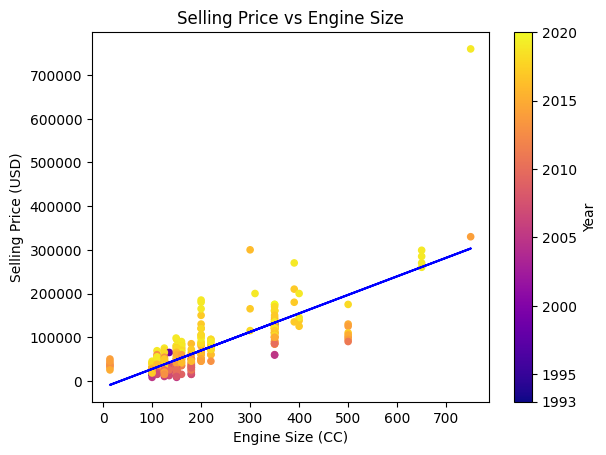

In [333]:
temp_df = df[df["CC"].notna()]

ax = temp_df.plot.scatter(x='CC', y = 'selling_price', c=temp_df["year"], cmap=plt.cm.plasma, colorbar=False)
plt.xlabel('Engine Size (CC)')
plt.ylabel('Selling Price (USD)')
plt.title('Selling Price vs Engine Size')

colorbar = plt.colorbar(ax.collections[0], ax=ax, ticks=[1993, 1995, 2000, 2005, 2010, 2015, 2020])
colorbar.set_label('Year')

m, b = np.polyfit(temp_df["CC"], temp_df["selling_price"], 1)
plt.plot(temp_df["CC"], m*temp_df["CC"]+b, color="blue")

plt.show()

In [334]:
correlation = temp_df["CC"].corr(temp_df["selling_price"])
print(f"Correlation between Engine Size and Selling Price: {correlation:.3f}")

correlation = df["year"].corr(df["selling_price"])
print(f"Correlation between Year and Selling price: {correlation:.3f}")

Correlation between Engine Size and Selling Price: 0.787
Correlation between Year and Selling price: 0.402


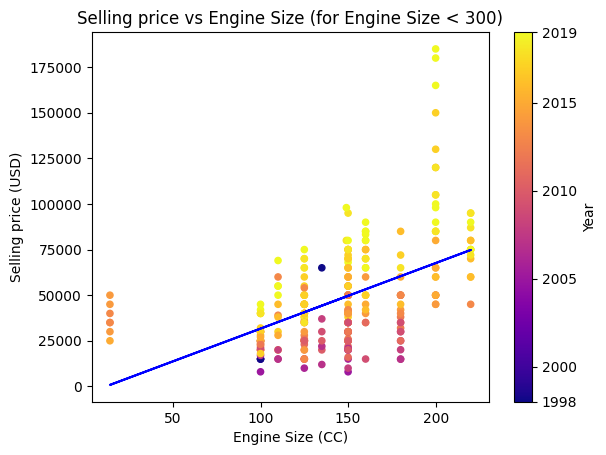

In [335]:
temp_df = df[df["CC"].notna()]
temp_df = temp_df[temp_df["CC"] < 300]
ax = temp_df.plot.scatter(x='CC', y = 'selling_price', c=temp_df["year"], cmap=plt.cm.plasma, colorbar=False)
plt.xlabel('Engine Size (CC)')
plt.ylabel('Selling price (USD)')
plt.title('Selling price vs Engine Size (for Engine Size < 300)')

colorbar = plt.colorbar(ax.collections[0], ax=ax, ticks=[1998, 2000, 2005, 2010, 2015, 2019])
colorbar.set_label('Year')

m, b = np.polyfit(temp_df["CC"], temp_df["selling_price"], 1)
plt.plot(temp_df["CC"], m*temp_df["CC"]+b, color="blue")

plt.show()

In [336]:
correlation = temp_df["CC"].corr(temp_df["selling_price"])
print(f"Correlation between Engine Size and Selling Price for CC < 300: {correlation:.3f}")

correlation = temp_df["year"].corr(temp_df["selling_price"])
print(f"Correlation between Year and selling price for CC < 300: {correlation:.3f}")

Correlation between Engine Size and Selling Price for CC < 300: 0.506
Correlation between Year and selling price for CC < 300: 0.616


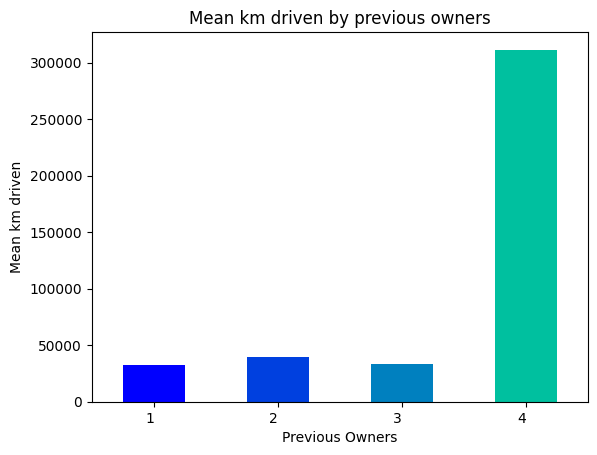

In [337]:
grouped_data = df.groupby('owner')['km_driven'].mean()

ax = grouped_data.plot.bar(color=plt.get_cmap("winter")(np.arange(4) / 4))
plt.xlabel('Previous Owners')
plt.ylabel('Mean km driven')
plt.title('Mean km driven by previous owners')

ax.set_xticklabels([label.get_text()[0] for label in ax.get_xticklabels()], rotation=0, ha="right")

plt.show()

In [338]:
display(df[df["owner"] == "4th owner"])

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,CC
311,Harley-Davidson Street 750,330000,2014,Individual,4th owner,6500,534000.0,750
642,TVS Apache RTR 160,15000,2009,Individual,4th owner,880000,NaN,160
698,Hero Honda CBZ,10000,2000,Individual,4th owner,48000,NaN,<NA>


In [339]:
df.drop(642, inplace=True)

display(df[df["owner"] == "4th owner"])

,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,CC
311,Harley-Davidson Street 750,330000,2014,Individual,4th owner,6500,534000.0,750
698,Hero Honda CBZ,10000,2000,Individual,4th owner,48000,NaN,<NA>


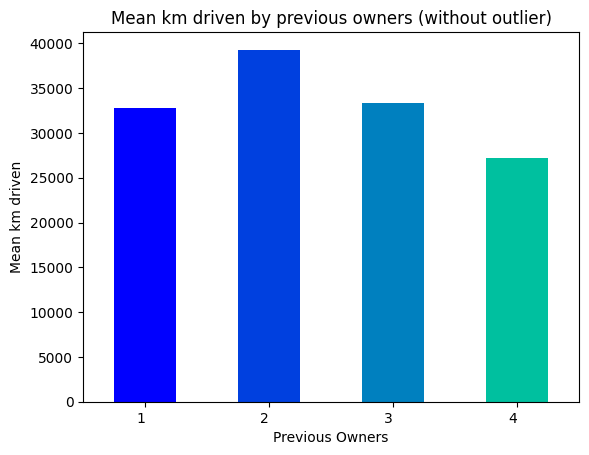

In [340]:
grouped_data = df.groupby('owner')['km_driven'].mean()

ax = grouped_data.plot.bar(color=plt.get_cmap("winter")(np.arange(4) / 4))
plt.xlabel('Previous Owners')
plt.ylabel('Mean km driven')
plt.title('Mean km driven by previous owners (without outlier)')

ax.set_xticklabels([label.get_text()[0] for label in ax.get_xticklabels()], rotation=0, ha="right")

plt.show()

In [341]:
grouped_data = [group['km_driven'].values for name, group in df.groupby('owner')]
print(stats.f_oneway(*grouped_data).pvalue)

0.5085253640620842
